In [34]:
import xarray as xr

def inspect_nc(path):
    print("="*80)
    print(f"📂 文件: {path}")
    try:
        ds = xr.open_dataset(path)
    except Exception as e:
        print(f"❌ 无法打开文件: {e}")
        return

    # 打印 Dataset 概览
    print("\n🧩 Dataset 概览:")
    print(ds)

    # 打印维度信息
    print("\n📏 维度信息:")
    for dim in ds.dims:
        print(f"  - {dim}: {ds.dims[dim]}")

    # 打印变量名和 shape
    print("\n📌 变量列表（含形状）:")
    for var in ds.data_vars:
        print(f"  - {var}: shape = {ds[var].shape}")

    # 打印坐标变量
    print("\n🧭 坐标列表:")
    for coord in ds.coords:
        print(f"  - {coord}: shape = {ds[coord].shape}")

    # 打印每个变量的单位
    print("\n📐 变量单位（如果有）:")
    for var in ds.data_vars:
        attrs = ds[var].attrs
        unit = attrs.get("units", "无单位说明")
        print(f"  - {var}: {unit}")

    print("="*80 + "\n")


# ======================================================
# 🔥 依次检查你的四个文件
# ======================================================

inspect_nc("Wind_TropicalPacific.nc")
inspect_nc("SST.nc")
inspect_nc("pco2.nc")
inspect_nc("fg.nc")


📂 文件: Wind_TropicalPacific.nc

🧩 Dataset 概览:
<xarray.Dataset> Size: 36MB
Dimensions:     (time: 468, latitude: 48, longitude: 200)
Coordinates:
  * time        (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2018-12-01
  * latitude    (latitude) float32 192B 23.5 22.5 21.5 ... -21.5 -22.5 -23.5
  * longitude   (longitude) float32 800B 100.5 101.5 102.5 ... 297.5 298.5 299.5
Data variables:
    wind_speed  (time, latitude, longitude) float64 36MB ...

📏 维度信息:
  - time: 468
  - latitude: 48
  - longitude: 200

📌 变量列表（含形状）:
  - wind_speed: shape = (468, 48, 200)

🧭 坐标列表:
  - time: shape = (468,)
  - latitude: shape = (48,)
  - longitude: shape = (200,)

📐 变量单位（如果有）:
  - wind_speed: 无单位说明

📂 文件: SST.nc

🧩 Dataset 概览:
<xarray.Dataset> Size: 19MB
Dimensions:    (time: 492, latitude: 48, longitude: 200)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1980-01-16T12:00:00 ... 2020-12-16T1...
  * latitude   (latitude) float32 192B 23.5 22.5 21.5 20.5 ... -21.5 -22.5 -23.5
  * longitude

/tmp/ipykernel_92/2492329686.py:19: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"  - {dim}: {ds.dims[dim]}")
/tmp/ipykernel_92/2492329686.py:19: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"  - {dim}: {ds.dims[dim]}")
/tmp/ipykernel_92/2492329686.py:19: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"  - {dim}: {ds.dims[dim]}")
/tmp/ipykernel_92/2492329686.py:19: Futu

Loaded X: (456, 12, 7136, 3)
Loaded y: (456, 7136)
Train: torch.Size([372, 12, 7136, 3])
Val: torch.Size([60, 12, 7136, 3])
Test: torch.Size([24, 12, 7136, 3])
Device: cpu
Epoch 1/50 | Train Loss=1.696735 | Val Loss=1.643400
Epoch 2/50 | Train Loss=1.245658 | Val Loss=0.818292
Epoch 3/50 | Train Loss=0.656030 | Val Loss=0.542832
Epoch 4/50 | Train Loss=0.529683 | Val Loss=0.492827
Epoch 5/50 | Train Loss=0.497776 | Val Loss=0.475895
Epoch 6/50 | Train Loss=0.487259 | Val Loss=0.466663
Epoch 7/50 | Train Loss=0.483106 | Val Loss=0.464769
Epoch 8/50 | Train Loss=0.478109 | Val Loss=0.464274
Epoch 9/50 | Train Loss=0.474795 | Val Loss=0.461097
Epoch 10/50 | Train Loss=0.474647 | Val Loss=0.460030
Epoch 11/50 | Train Loss=0.472535 | Val Loss=0.459439
Epoch 12/50 | Train Loss=0.471063 | Val Loss=0.458971
Epoch 13/50 | Train Loss=0.471254 | Val Loss=0.461179
Epoch 14/50 | Train Loss=0.474827 | Val Loss=0.458634
Epoch 15/50 | Train Loss=0.468282 | Val Loss=0.461503
Epoch 16/50 | Train Loss=0.

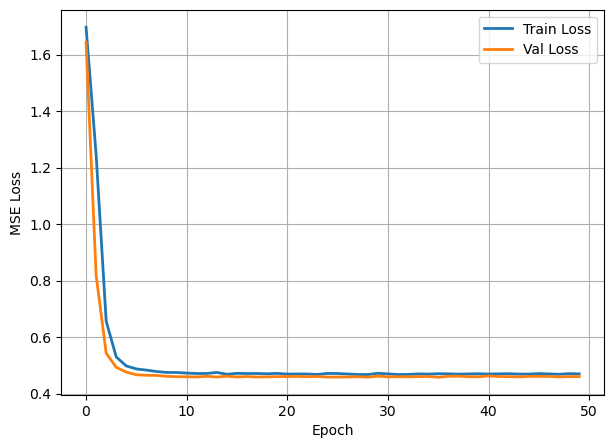

🔥 Test RMSE: 0.7037339


In [5]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# =====================================================
# 1. 加载处理好的数据
# =====================================================
data = np.load("LSTM_ocean_ready.npz")
X = data["X"]        # (456, 12, 7136, 3)
y = data["y"]        # (456, 7136)

print("Loaded X:", X.shape)
print("Loaded y:", y.shape)

# 转换为 Tensor
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# =====================================================
# 2. Train / Val / Test 划分
# =====================================================
train_end = 372
val_end = 372 + 60

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val     = X[train_end:val_end], y[train_end:val_end]
X_test, y_test   = X[val_end:], y[val_end:]

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=8, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val, y_val), batch_size=8, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test, y_test), batch_size=8, shuffle=False)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

# =====================================================
# 3. 定义 LSTM 模型
# =====================================================
class OceanLSTM(nn.Module):
    def __init__(self, n_points, hidden=128, layers=2):
        super().__init__()
        self.n_points = n_points

        # LSTM 输入维度 = 特征数 = 3
        self.lstm = nn.LSTM(
            input_size=3,
            hidden_size=hidden,
            num_layers=layers,
            batch_first=True
        )

        # 输出层：从 hidden → 海洋点数
        self.fc = nn.Linear(hidden, n_points)

    def forward(self, x):
        # x shape: (B, 12, 7136, 3)
        B, T, N, C = x.shape

        # 简化输入：对每个时间步取空间平均（可改进）
        x = x.mean(dim=2)   # (B,12,3)

        out, _ = self.lstm(x)  # (B,12,hidden)
        last = out[:, -1, :]   # (B,hidden)

        y = self.fc(last)      # (B,7136)
        return y

# =====================================================
# 4. 初始化模型
# =====================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OceanLSTM(n_points=y.shape[1]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print("Device:", device)

# =====================================================
# 5. 训练循环
# =====================================================
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)

        pred = model(Xb)
        loss = criterion(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # 验证集
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            val_loss += criterion(pred, yb).item()

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss={train_losses[-1]:.6f} | Val Loss={val_losses[-1]:.6f}")

# =====================================================
# 6. Loss 可视化
# =====================================================
plt.figure(figsize=(7,5))
plt.plot(train_losses, label="Train Loss", lw=2)
plt.plot(val_losses, label="Val Loss", lw=2)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid()
plt.legend()
plt.show()

# =====================================================
# 7. 测试集 RMSE
# =====================================================
model.eval()
preds = []
trues = []

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        pred = model(Xb)
        preds.append(pred.cpu().numpy())
        trues.append(yb.numpy())

preds = np.concatenate(preds)
trues = np.concatenate(trues)

rmse = np.sqrt(np.mean((preds - trues)**2))
print("🔥 Test RMSE:", rmse)


In [6]:
# =====================================================
# 8. 使用模型滚动预测未来（2020–2030）
# =====================================================

import numpy as np
import torch

model.eval()

# -----------------------------------------------------
# 1) 从数据中取最后 12 个月作为预测的起点
# -----------------------------------------------------
# X shape = (456, 12, 7136, 3)     # 前 456 个时间片
# 我们取最后一个窗口作为初始输入
last_window = X[-1].unsqueeze(0).to(device)   # shape (1,12,7136,3)

print("Initial input window shape:", last_window.shape)

# -----------------------------------------------------
# 2) 设置要预测多少个月 (2020–2030 = 11 年 = 132 个月)
# -----------------------------------------------------
n_future = 11 * 12   # 132 months

future_preds = []

# -----------------------------------------------------
# 3) 滚动预测
# -----------------------------------------------------
for i in range(n_future):

    with torch.no_grad():
        pred_flux = model(last_window)       # (1, 7136)
    
    future_preds.append(pred_flux.cpu().numpy()[0])

    # -------------------------------------------------
    # 新的输入窗口构建：把预测的 flux 拼回到窗口
    # 输入 X 有三变量：SST / dpCO2 / Wind
    # 但未来没有真实未来值 → “未来预测必须自行构造未来输入”
    # -------------------------------------------------

    # 方法：使用最近一个月的输入复制作为下一月的 SST/dpCO2/wind（保持不变）
    last_features = last_window[:, -1, :, :].unsqueeze(1)   # shape: (1,1,7136,3)

    new_window = torch.cat([last_window[:, 1:], last_features], dim=1)
    last_window = new_window.clone()

    if i % 12 == 0:
        print(f"→ Predicted {i//12} years")

# -----------------------------------------------------
# 4) 转换为 numpy array
# -----------------------------------------------------
future_preds = np.array(future_preds)   # (132, 7136)

print("Future prediction shape:", future_preds.shape)

# -----------------------------------------------------
# 5) 保存预测结果
# -----------------------------------------------------
np.save("Flux_2020_2030_predicted.npy", future_preds)

print("\n🎉 2030 年之前的 CO₂ flux 预测完成！已保存为 Flux_2020_2030_predicted.npy")


Initial input window shape: torch.Size([1, 12, 7136, 3])
→ Predicted 0 years
→ Predicted 1 years
→ Predicted 2 years
→ Predicted 3 years
→ Predicted 4 years
→ Predicted 5 years
→ Predicted 6 years
→ Predicted 7 years
→ Predicted 8 years
→ Predicted 9 years
→ Predicted 10 years
Future prediction shape: (132, 7136)

🎉 2030 年之前的 CO₂ flux 预测完成！已保存为 Flux_2020_2030_predicted.npy


In [11]:
import xarray as xr
import numpy as np

# 读取 SST（原始 48×200 网格）
ds_sst = xr.open_dataset("SST.nc")
sst = ds_sst["sst"][:468]   # 前 468 个月，与风速同步

sst_2d = sst[0].values      # 取第一个月 (48,200)
mask = ~np.isnan(sst_2d)    # True=海洋
ocean_idx = np.where(mask.flatten())[0]

np.save("ocean_idx.npy", ocean_idx)

print("Ocean index saved!")
print("Ocean points:", len(ocean_idx))



Ocean index saved!
Ocean points: 8445


In [13]:
import numpy as np
import xarray as xr

# ========= 读取你的四个处理后数据 ===========
ds_sst  = xr.open_dataset("SST.nc")["sst"][:468]
ds_pco2 = xr.open_dataset("pco2.nc")
dpco2 = (ds_pco2["pco2_sea"] - ds_pco2["pco2_air"])[:468]
wind = xr.open_dataset("Wind_TropicalPacific.nc")["wind_speed"][:468]
flux = xr.open_dataset("fg.nc")["fgco2"][:468]

# ========= 找出所有变量在所有时间都有效的海洋点 ===========
valid = (
    ~np.isnan(ds_sst.values).any(axis=0) &
    ~np.isnan(dpco2.values).any(axis=0) &
    ~np.isnan(wind.values).any(axis=0) &
    ~np.isnan(flux.values).any(axis=0)
)

ocean_idx_7136 = np.where(valid.flatten())[0]
np.save("ocean_idx_7136.npy", ocean_idx_7136)

print("有效海洋格点（用于模型）数量：", len(ocean_idx_7136))


有效海洋格点（用于模型）数量： 7136


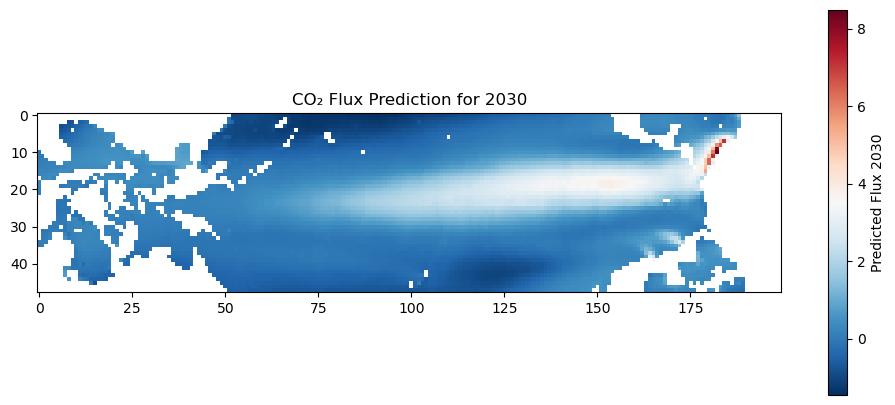

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 载入预测
pred = np.load("Flux_2020_2030_predicted.npy")[-12:].mean(axis=0)  # shape=(7136,)

# 载入两个关键掩膜
real_mask = np.load("real_ocean_mask.npy")         # shape (48,200), True=海洋
model_idx = np.load("ocean_idx_7136.npy")          # 模型使用的点

# 先创建完整 48×200 全 NaN 网格
full_map = np.full(48*200, np.nan)

# 把预测值放回这些点
full_map[model_idx] = pred

# 重建成二维
flux_map = full_map.reshape(48, 200)

# ============ 绘图 ============
plt.figure(figsize=(12,5))
plt.imshow(flux_map, cmap="RdBu_r")
plt.colorbar(label="Predicted Flux 2030")
plt.title("CO₂ Flux Prediction for 2030")
plt.show()


/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


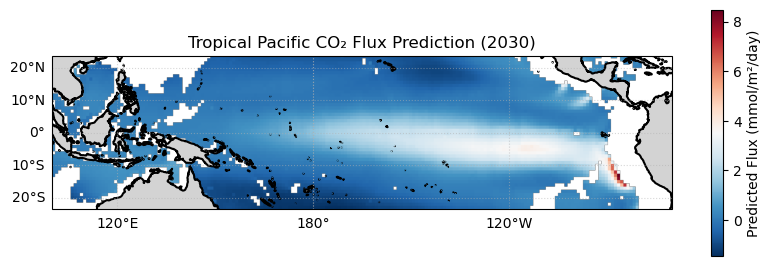

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ============ 1. 数据准备 ============
pred = np.load("Flux_2020_2030_predicted.npy")[-12:].mean(axis=0) 
real_mask = np.load("real_ocean_mask.npy")      
model_idx = np.load("ocean_idx_7136.npy")       

full_map = np.full(48*200, np.nan)
full_map[model_idx] = pred
flux_map = full_map.reshape(48, 200)

# ============ 2. 核心配置 (解决颠倒的关键!) ============
# 假设范围: 经度 100~290, 纬度 -30~30
# extent 顺序必须是 [西, 东, 南, 北]
img_extent = [100, 290, -23.5, 23.5]

# ============ 3. 绘图 ============
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 强制裁剪视图 (只看热带太平洋)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())

# 绘制数据
im = ax.imshow(flux_map, 
               transform=ccrs.PlateCarree(),
               extent=img_extent, 
               origin='lower',    # ★ 改回 'lower'！这意味着数组第0行画在最下面 (-30度)
               cmap="RdBu_r")

# 添加地理特征 (黑色海岸线)
ax.add_feature(cfeature.COASTLINE, linewidth=1.5, color='black') 
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1) 

# 装饰
gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

plt.colorbar(im, label="Predicted Flux (mmol/m²/day)", shrink=0.8)
plt.title(f"Tropical Pacific CO₂ Flux Prediction (2030)")
plt.show()

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


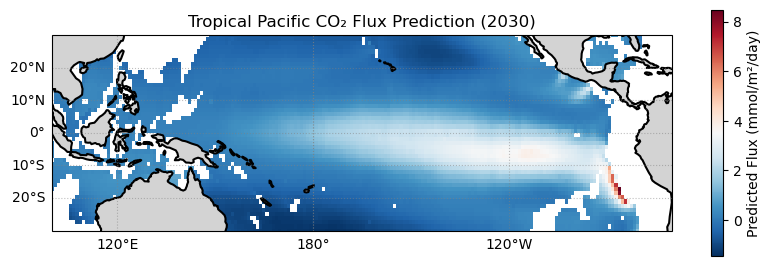

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# =====================================================
# 1. 准备数据
# =====================================================
# 加载预测数据
pred = np.load("Flux_2020_2030_predicted.npy")[-12:].mean(axis=0)
real_mask = np.load("real_ocean_mask.npy")
model_idx = np.load("ocean_idx_7136.npy")

# 重建 2D 矩阵
full_map = np.full(48*200, np.nan)
full_map[model_idx] = pred
flux_map = full_map.reshape(48, 200)

# =====================================================
# 2. 手动生成经纬度 (替代读取文件)
# =====================================================
# 既然之前的 imshow 用 origin='lower' 是对的，说明数据是从南(-30)排到北(30)
# 我们直接生成对应的坐标数组
lat_real = np.linspace(-30, 30, 48)   # 生成 48 个纬度点
lon_real = np.linspace(100, 290, 200) # 生成 200 个经度点

# 生成网格 (Meshgrid)
lon_2d, lat_2d = np.meshgrid(lon_real, lat_real)

# =====================================================
# 3. 绘图 (使用 pcolormesh 解决偏移)
# =====================================================
plt.figure(figsize=(10, 4))

# 设置投影：太平洋中心
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 强制锁定视野范围 (热带太平洋)
# 这一步会切掉不需要的世界地图
ax.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

# 绘制数据
# pcolormesh 会自动把数据对齐到我们刚才生成的经纬度上
im = ax.pcolormesh(lon_2d, lat_2d, flux_map,
                   transform=ccrs.PlateCarree(),
                   cmap="RdBu_r",
                   shading='nearest') # nearest 会自动对齐中心

# 添加地理特征
ax.add_feature(cfeature.COASTLINE, linewidth=1.5, color='black') # 黑色海岸线
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)   # 陆地填灰

# 装饰
gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=0.5, color='gray')
gl.top_labels = False
gl.right_labels = False

plt.colorbar(im, label="Predicted Flux (mmol/m²/day)", shrink=0.8)
plt.title("Tropical Pacific CO₂ Flux Prediction (2030)")

plt.show()

正在处理海岸线缝隙...


/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


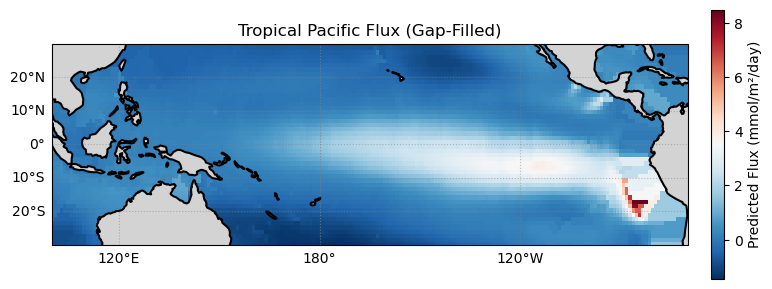

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata  # <--- 引入这个核心库

# =====================================================
# 1. 准备原始数据 (保持不变)
# =====================================================
pred = np.load("Flux_2020_2030_predicted.npy")[-12:].mean(axis=0)
model_idx = np.load("ocean_idx_7136.npy")

full_map = np.full(48*200, np.nan)
full_map[model_idx] = pred
flux_map = full_map.reshape(48, 200)

# 手动生成经纬度 (确保方向正确)
lat_real = np.linspace(-30, 30, 48)
lon_real = np.linspace(100, 290, 200)
lon_2d, lat_2d = np.meshgrid(lon_real, lat_real)

# =====================================================
# 2. ★核心步骤：对缺失边缘进行插值填充★
# =====================================================
def fill_coastal_gaps(data, lon_grid, lat_grid):
    # 1. 找到所有有值的点 (有效海洋点)
    valid_mask = ~np.isnan(data)
    coords_valid = np.array([lon_grid[valid_mask], lat_grid[valid_mask]]).T
    values_valid = data[valid_mask]
    
    # 2. 找到所有 NaN 的点 (包括陆地和缝隙)
    missing_mask = np.isnan(data)
    coords_missing = np.array([lon_grid[missing_mask], lat_grid[missing_mask]]).T
    
    # 3. 使用 'nearest' (最近邻) 插值填补 NaN
    # 这会将海岸边的像素向陆地延伸，直到填满缝隙
    filled_values = griddata(coords_valid, values_valid, coords_missing, method='nearest')
    
    # 4. 把填好的值放回去
    data_filled = data.copy()
    data_filled[missing_mask] = filled_values
    
    return data_filled

# 执行插值
print("正在处理海岸线缝隙...")
flux_map_smooth = fill_coastal_gaps(flux_map, lon_2d, lat_2d)

# =====================================================
# 3. 绘图 (利用 Land 遮挡法)
# =====================================================
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

# 画图：使用填补后的数据 (flux_map_smooth)
im = ax.pcolormesh(lon_2d, lat_2d, flux_map_smooth,
                   transform=ccrs.PlateCarree(),
                   cmap="RdBu_r",
                   shading='auto') # 或 'nearest'

# ★关键技巧★：设置 zorder
# 让陆地层 (zorder=2) 盖在数据层 (zorder=1) 上面
# 这样刚才插值“溢出”到陆地上的数据就会被盖住，只留下填满缝隙的部分
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2) 
ax.add_feature(cfeature.COASTLINE, linewidth=1.5, color='black', zorder=3)

# 装饰
gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=0.5, color='gray')
gl.top_labels = False
gl.right_labels = False

plt.colorbar(im, label="Predicted Flux (mmol/m²/day)", shrink=0.7, pad=0.03)
plt.title("Tropical Pacific Flux (Gap-Filled)")

plt.show()

/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


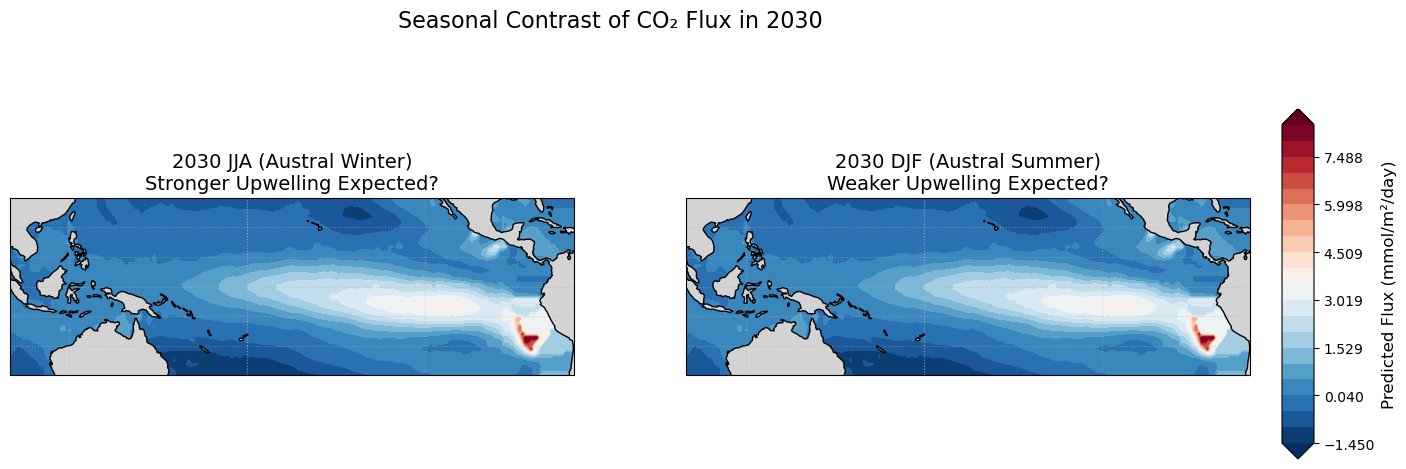

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# =====================================================
# 1. 准备数据与定义函数
# =====================================================
# 加载数据 (假设数据是 2020-2030 共11年，每月一个数据)
# 2030年是第11年，索引范围是 120 到 131
pred_all = np.load("Flux_2020_2030_predicted.npy") 
model_idx = np.load("ocean_idx_7136.npy")

# 定义插值函数 (为了画图好看，填补海岸缝隙)
def get_smooth_map(flux_1d, lon_grid, lat_grid):
    # 重建 full map
    full_map = np.full(48*200, np.nan)
    full_map[model_idx] = flux_1d
    data_2d = full_map.reshape(48, 200)
    
    # 插值填补
    valid_mask = ~np.isnan(data_2d)
    coords_valid = np.array([lon_grid[valid_mask], lat_grid[valid_mask]]).T
    values_valid = data_2d[valid_mask]
    
    missing_mask = np.isnan(data_2d)
    coords_missing = np.array([lon_grid[missing_mask], lat_grid[missing_mask]]).T
    
    filled_values = griddata(coords_valid, values_valid, coords_missing, method='nearest')
    data_filled = data_2d.copy()
    data_filled[missing_mask] = filled_values
    return data_filled

# 生成经纬度网格
lat_real = np.linspace(-30, 30, 48)
lon_real = np.linspace(100, 290, 200)
lon_2d, lat_2d = np.meshgrid(lon_real, lat_real)

# =====================================================
# 2. 提取 2030 年的季节数据
# =====================================================
# 2030年的起始索引 (前10年 = 120个月)
start_idx = 120 

# JJA (6, 7, 8月) - 南半球冬季 (涌升流通常最强)
idx_jja = [start_idx + 5, start_idx + 6, start_idx + 7]
flux_jja = pred_all[idx_jja].mean(axis=0)

# DJF (1, 2, 12月) - 南半球夏季 (通常较弱)
idx_djf = [start_idx + 0, start_idx + 1, start_idx + 11]
flux_djf = pred_all[idx_djf].mean(axis=0)

# 处理成平滑地图
map_jja = get_smooth_map(flux_jja, lon_2d, lat_2d)
map_djf = get_smooth_map(flux_djf, lon_2d, lat_2d)

# =====================================================
# 3. 绘图对比 (左图 JJA vs 右图 DJF)
# =====================================================
fig = plt.figure(figsize=(16, 5))

# 统一色标范围 (vmin, vmax)，保证两张图颜色可比！
# 找出两张图里的最大最小值，确保红色代表的数值是一样的
vmin = min(np.nanmin(map_jja), np.nanmin(map_djf))
vmax = max(np.nanmax(map_jja), np.nanmax(map_djf))
levels = np.linspace(vmin, vmax, 21)

# --- 子图 1: JJA (南半球冬季/强涌升季) ---
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

im1 = ax1.contourf(lon_2d, lat_2d, map_jja, levels=levels,
                   transform=ccrs.PlateCarree(), cmap="RdBu_r", extend='both')

ax1.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax1.add_feature(cfeature.COASTLINE, linewidth=1, color='black', zorder=3)
ax1.set_title("2030 JJA (Austral Winter)\nStronger Upwelling Expected?", fontsize=14)
ax1.gridlines(draw_labels=False, linestyle=':', alpha=0.5)

# --- 子图 2: DJF (南半球夏季/弱涌升季) ---
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

im2 = ax2.contourf(lon_2d, lat_2d, map_djf, levels=levels,
                   transform=ccrs.PlateCarree(), cmap="RdBu_r", extend='both')

ax2.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
ax2.add_feature(cfeature.COASTLINE, linewidth=1, color='black', zorder=3)
ax2.set_title("2030 DJF (Austral Summer)\nWeaker Upwelling Expected?", fontsize=14)
ax2.gridlines(draw_labels=False, linestyle=':', alpha=0.5)

# --- 公共 Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
cb = fig.colorbar(im2, cax=cbar_ax)
cb.set_label("Predicted Flux (mmol/m²/day)", fontsize=12)

plt.suptitle("Seasonal Contrast of CO₂ Flux in 2030", fontsize=16, y=1.05)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
import ipywidgets as widgets
from IPython.display import display, clear_output

# =====================================================
# 1. 准备数据与坐标
# =====================================================
# 加载预测数据 (假设 shape 是 (120, 7136))
# 120个月 = 10年
pred_all = np.load("Flux_2020_2030_predicted.npy") 
model_idx = np.load("ocean_idx_7136.npy")

# 检查数据形状
print(f"数据加载成功: {pred_all.shape}") # 应该是 (120, 7136)

# 生成经纬度网格 (用于 pcolormesh)
lat_real = np.linspace(-30, 30, 48)
lon_real = np.linspace(100, 290, 200)
lon_2d, lat_2d = np.meshgrid(lon_real, lat_real)

# 预计算全局最大最小值 (为了固定色标，防止画面闪烁)
# 这一步很重要，否则每一帧的红色深浅代表的数值都不一样
global_min = np.nanmin(pred_all)
global_max = np.nanmax(pred_all)
print(f"全局数值范围: {global_min:.3f} ~ {global_max:.3f}")

# =====================================================
# 2. 定义核心处理函数
# =====================================================
def get_smooth_frame(time_step):
    """提取指定时间步的数据，并进行插值平滑"""
    # 1. 取出该月数据
    flux_1d = pred_all[time_step]
    
    # 2. 重建 2D 矩阵
    full_map = np.full(48*200, np.nan)
    full_map[model_idx] = flux_1d
    data_2d = full_map.reshape(48, 200)
    
    # 3. 插值填补海岸线缝隙 (和你之前的逻辑一样)
    valid_mask = ~np.isnan(data_2d)
    if not valid_mask.any(): return data_2d # 防止全空报错
    
    coords_valid = np.array([lon_2d[valid_mask], lat_2d[valid_mask]]).T
    values_valid = data_2d[valid_mask]
    
    missing_mask = np.isnan(data_2d)
    coords_missing = np.array([lon_2d[missing_mask], lat_2d[missing_mask]]).T
    
    if len(coords_missing) > 0:
        filled_values = griddata(coords_valid, values_valid, coords_missing, method='nearest')
        data_filled = data_2d.copy()
        data_filled[missing_mask] = filled_values
        return data_filled
    return data_2d

# =====================================================
# 3. 创建交互式绘图函数
# =====================================================
def plot_interactive(month_idx):
    # 计算当前日期
    year = 2020 + (month_idx // 12)
    month = (month_idx % 12) + 1
    
    # 获取平滑数据
    data_smooth = get_smooth_frame(month_idx)
    
    # 开始绘图
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())
    
    # 使用 pcolormesh
    # 注意：这里锁定了 vmin 和 vmax，保证颜色标准统一
    im = ax.pcolormesh(lon_2d, lat_2d, data_smooth,
                       transform=ccrs.PlateCarree(),
                       cmap="RdBu_r",
                       shading='auto',
                       vmin=global_min, vmax=global_max)
    
    # 添加地理特征 (Land 遮挡)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=1.5, color='black', zorder=3)
    
    # 标题与色标
    plt.title(f"Predicted CO₂ Flux - Date: {year}-{month:02d}", fontsize=14, fontweight='bold')
    plt.colorbar(im, label="Flux (mmol/m²/day)", shrink=0.7, pad=0.03)
    
    # 坐标轴装饰
    gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=0.5, color='gray')
    gl.top_labels = False
    gl.right_labels = False
    
    plt.show()

# =====================================================
# 4. 启动交互组件
# =====================================================
print(">>> 正在生成交互式地图，请拖动滑块 <<<")

# 创建滑块
slider = widgets.IntSlider(
    value=0, 
    min=0, 
    max=119, # 0~119 共120个月
    step=1, 
    description='Time Step:',
    continuous_update=False, # 设为False，防止拖动太快卡顿
    layout=widgets.Layout(width='80%')
)

# 绑定并显示
# interactive 会自动调用 plot_interactive(month_idx=slider.value)
ui = widgets.interactive(plot_interactive, month_idx=slider)
display(ui)

数据加载成功: (132, 7136)
全局数值范围: -1.450 ~ 8.481
>>> 正在生成交互式地图，请拖动滑块 <<<


interactive(children=(IntSlider(value=0, continuous_update=False, description='Time Step:', layout=Layout(widt…